# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?) 

In [ ]:
(RFM) Récence, Fréquence, Monétaire 
Is a marketing analysis tool used to identify the best customers of a business based on the nature of their spending habits.
(Est un outil d analyse marketing utilisé pour identifier les meilleurs clients d une entreprise en fonction de la nature de leurs habitudes de dépenses.)

❓ Can you summarize what each metric measures in one sentence?

❓ What data / or type of data do you need for each metric ? 

Let's explore the dataset!

# Exploratory Data Analysis

Load the dataset and start an Exploratory Data Analysis

In [40]:
import pandas as pd

In [41]:
df = pd.read_csv('C:/Users/simplon/Desktop/test/db_customers.csv')
df

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


❓ Which features should be formated in datetime ? 
Convert them

In [ ]:
order_purchase_timestamp
order_delivered_customer_date

In [6]:
from datetime import datetime
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(pd.to_datetime)
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].apply(pd.to_datetime)

❓ Which features are Categorical ? List the unique values on these features.

In [ ]:
payment_value

❓ Check for missing values. What do you notice ? 


In [7]:
df.isnull().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3159
payment_type                        1
payment_installments                1
payment_value                       1
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2410
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       105383 non-null  object        
 1   order_status                   105383 non-null  object        
 2   order_purchase_timestamp       105383 non-null  datetime64[ns]
 3   order_delivered_customer_date  102224 non-null  datetime64[ns]
 4   payment_type                   105382 non-null  object        
 5   payment_installments           105382 non-null  float64       
 6   payment_value                  105382 non-null  float64       
 7   review_score                   105383 non-null  int64         
 8   customer_unique_id             105383 non-null  object        
 9   customer_zip_code_prefix       105383 non-null  int64         
 10  customer_city                  105383 non-null  object        
 11  

❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

In [ ]:
Qui ne sont pas encore livré

❓ What are the proportions of each `order_status` ? 

In [9]:
df['order_status']
df['order_status'].value_counts()

delivered      102225
shipped          1180
canceled          669
unavailable       651
invoiced          330
processing        321
created             5
approved            2
Name: order_status, dtype: int64

❓ Which `order_status` do you think should be removed from the analysis

In [ ]:
approved

❓ What feature would you choose in the e-commerce dataset provided? 

In [ ]:
payment_value

❓ What method would you use to group the data? 

In [86]:
customer_unique_id

Group the data. (Hint: you can carry out the grouping one by one and then merge, or even better use the .agg method and get a robust grouping in one line of code)

In [101]:
group_by = df["order_status"].groupby(df["customer_unique_id"])
group_by

In [102]:
group_by = df["order_purchase_timestamp"].groupby(df["customer_unique_id"])
group_by

In [103]:
group_by = df["payment_value"].groupby(df["customer_unique_id"])
group_by

In [42]:
df = df.groupby(['customer_unique_id','order_purchase_timestamp','payment_type']).agg(Montant=pd.NamedAgg(column='payment_value', aggfunc=sum), 
                                                     Fréquence=pd.NamedAgg(column='payment_value', aggfunc='count'),
                                                     Panier_moyen=pd.NamedAgg(column='payment_value', aggfunc='mean')).reset_index()
df

,customer_unique_id,order_purchase_timestamp,payment_type,Montant,Fréquence,Panier_moyen
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,credit_card,141.90,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,credit_card,27.19,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,credit_card,86.22,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,credit_card,43.62,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,credit_card,196.89,1,196.89
...,...,...,...,...,...,...
101385,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,credit_card,2067.42,1,2067.42
101386,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,credit_card,84.58,1,84.58
101387,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,credit_card,112.46,1,112.46
101388,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,credit_card,133.69,1,133.69


What type of data is the R supposed to be? Is it in the right format? (Hint : investigate the difference between `datetime` and `timedelta`) 

So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

❓ What is the date of the least purchase?

In [11]:
least_recent_date = df["order_purchase_timestamp"].min()
least_recent_date

Timestamp('2016-09-04 21:15:19')

❓What is the date of the most recent purchase?

In [12]:
order_date = df["order_purchase_timestamp"].max()
order_date

Timestamp('2018-10-17 17:30:18')

❓What is the date of the most recent purchase?

In [13]:
middle_date = df["order_purchase_timestamp"].median()
middle_date

Timestamp('2018-01-18 14:09:22')

❓How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

In [14]:
test = order_date - middle_date
test

Timedelta('272 days 03:20:56')

Create a feature calculating the difference between `the most recent purchased + 1 day`, and `order_purchase_timestamp`.

Now that you have created a new dataset with the right columns, explore it to understand what you created.

❓Which column is the R? The F? The M?

Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

In [43]:
df.describe()

,Montant,Fréquence,Panier_moyen
count,101390.000000,101390.000000,101390.000000
mean,160.704964,1.039373,156.451879
std,226.261357,0.390651,218.382547
min,0.000000,1.000000,0.000000
25%,59.620000,1.000000,58.590000
50%,103.150000,1.000000,101.930000
75%,176.170000,1.000000,173.717500
max,13664.080000,42.000000,13664.080000


Now that you have clusters for each category, explain the different buying behaviors

In [44]:
import seaborn as sns

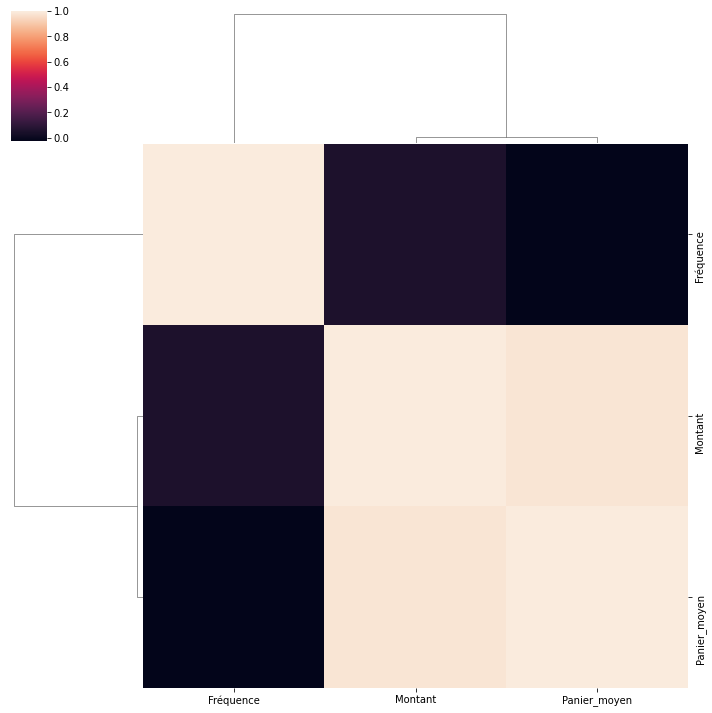

In [21]:
sns.clustermap(df.corr())

# Working with cohorts

❓What is a cohort? 

In [ ]:
L analyse de cohorte est la technique d analyse des données permettant de comprendre le comportement d un groupe particulier de clients sur une période de temps.

❓Why is it interesting to analyse cohorts ? 

In [ ]:
est une super méthode qui permet d’analyser et d’anticiper le comportement des clients et ainsi de mieux les comprendre

❓What data (already existing in the original dataset) do we need to build a cohort? 

In [ ]:
# Panier_moyen
# payment_type

customer_id
order_id
order_purchase_timestamp


Build a new df with just these 3 features

In [94]:
import matplotlib.pyplot 
import seaborn as sns
import operator 
import datetime as dt 
from math import isnan
from datetime import datetime, timedelta

In [95]:
df_new = df[['cutomer_id', 'order_id', 'order_purchase_timestamp']]
df_new

KeyError: "['order_id', 'cutomer_id'] not in index"

Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

In [83]:
df_new = pd.DataFrame({"order_purchase_timestamp": [1, 2, 3]},
                  index=pd.to_datetime(["2000-03-31 00:00:00",
                                        "2000-05-31 00:00:00",
                                        "2000-08-31 00:00:00"]))
df_new.index.to_period("M")

PeriodIndex(['2000-03', '2000-05', '2000-08'], dtype='period[M]', freq='M')

In [73]:
datetime_series = pd.Series(
    pd.date_range("2000-01-01", periods=3, freq="M")
)
datetime_series

0   2000-01-31
1   2000-02-29
2   2000-03-31
dtype: datetime64[ns]

In [60]:
datetime_series.dt.month


0    1
1    2
2    3
dtype: int64

In [ ]:
df_new['payment_value'] = df['order_purchase_timestamp'].dt.to_period('M')
df_new['cohort'] = df.groupby('Customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M')
df_new

Create a new feature called `cohort` by grouping the previous df by `customer_unique_id`, and tranforming it's minimum value in months (with the same `pandas.Serie.dt.to_period()` as before)

In [93]:
# For the teachers, To filter by only the customer that have done 2 or more purchases
df_more =pd.DataFrame(df_c.groupby('customer_unique_id').size()[df_c.groupby('customer_unique_id').size() > 1])
df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(columns={0:'na'},inplace=True)

df_c = df_c[df_c['na'].notna()]

NameError: name 'df_c' is not defined

In [92]:
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 
df_c

NameError: name 'df_c' is not defined

Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

In [67]:
frequency = df.groupby('customer_id')['order_purchase_timestamp'].count()
frequency =frequency.reset_index()
frequency.head()

KeyError: 'customer_id'

Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

Explore a cohort (for example 2017-01) and try to understand what it shows

Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

In [88]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

NameError: name 'df_cohort' is not defined

Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

Plot your `retention matrix` using the code below : 

In [86]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

NameError: name 'cohort_pivot' is not defined

In [ ]:

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


What do you notice? 

How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

Here is the code for the analysis of customers who have bought more than once : 

In [62]:
#start from your df created doing the RFM segmentation
df_c = df[['customer_unique_id', 'order_id',
           'order_purchase_timestamp']].drop_duplicates()

df_c['order_month'] = df_c['order_purchase_timestamp'].dt.to_period('M')

df_more = pd.DataFrame(df_c.groupby('customer_unique_id').size()[
                       df_c.groupby('customer_unique_id').size() > 1])

df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(
    columns={0: 'na'})

df_c = df_c[df_c['na'].notna()]
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
    .transform('min') \
    .dt.to_period('M')

df_cohort = df_c.groupby(['cohort', 'order_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index(drop=False)
df_cohort['period_number'] = (
    df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
                           'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(
        columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()

KeyError: "['order_id'] not in index"